In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd  

In [2]:
mnist = scipy.io.loadmat('mnist2/mnist-original.mat')
print(mnist)
x = mnist['data']
print(np.shape(x))
print(len(x[0]))
print('after transpose')
x = np.array(x)
x = np.transpose(x)
print(np.shape(x))
print(len(x[0]))
print(x[0])

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014', '__version__': '1.0', '__globals__': [], 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
      dtype=object), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}
(784, 70000)
70000
after transpose
(70000, 784)
784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0

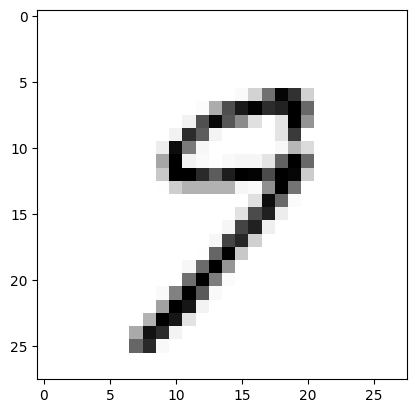

In [19]:
img = x[59999]
plt.imshow(img.reshape(28, 28), cmap="Greys")

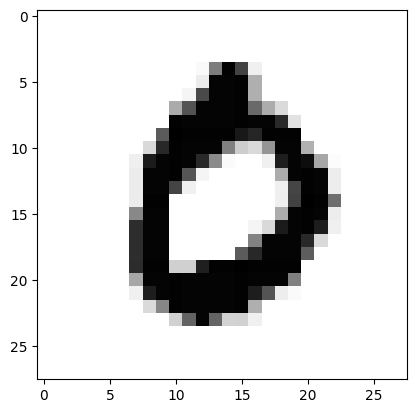

In [20]:
img = x[60000]
plt.imshow(img.reshape(28, 28), cmap="Greys")

In [3]:
y = mnist['label'][0]
print(y)

[0. 0. 0. ... 9. 9. 9.]


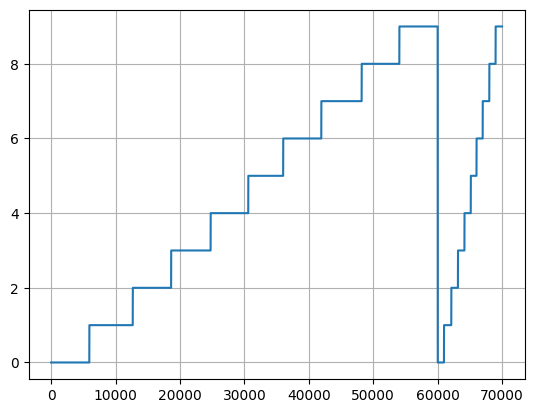

In [4]:
plt.figure(0)
plt.plot(y)
plt.grid()
plt.show()

In [5]:
l_train = 60000
x_train = x[:l_train]
y_train = y[:l_train]
print(y_train)

x_test = x[l_train:]
y_test = y[l_train:]
print(y_test)

[0. 0. 0. ... 9. 9. 9.]
[0. 0. 0. ... 9. 9. 9.]


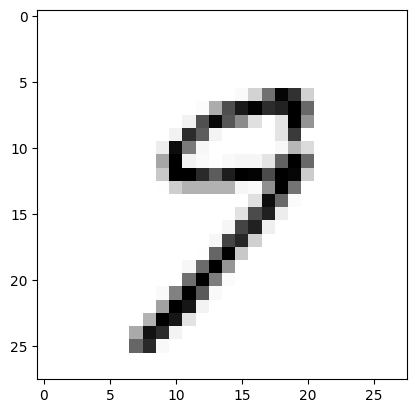

In [24]:
img = x_train[-1]
plt.imshow(img.reshape(28, 28), cmap="Greys")

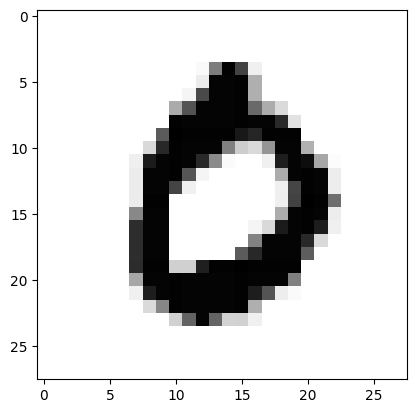

In [15]:
img = x_test[0]
plt.imshow(img.reshape(28, 28), cmap="Greys")

In [ ]:
#x_train_2cls, y_train_2cls

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_train)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

In [ ]:
#fit logistic regression model
start = time.time()
clf_LR = LogisticRegression()
clf_LR.fit(x_train, y_train)
y_pred = clf_LR.predict(x_test)
print(time.time() - start)

y_pred = np.array(y_pred)
comp = (y_pred == y_test)
N_cor = sum(comp)
print(y_pred[~comp][:50])
print(y_test[~comp][:50])
print('amount of error', len(y_test[~comp]))
print(N_cor / float(len(y_test)) * 100., '%')

plt.figure(1)
plt.plot(y_pred)
plt.plot(y_test, c = 'r')
plt.grid()
plt.title('Logistic regression')
plt.show()

In [ ]:
img = (x_test[~comp])[0]
plt.imshow(img.reshape(28, 28), cmap="Greys")
print((y_test[~comp])[0], (y_pred[~comp])[0])

In [ ]:
start = time.time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
print(time.time() - start)

y_pred = np.array(y_pred)
comp = (y_pred == y_test)
N_cor = sum(comp)
print(y_pred[~comp][:50])
print(y_test[~comp][:50])
print('amount of error', len(y_test[~comp]))
print(N_cor / float(len(y_test)) * 100., '%')

plt.figure(2)
plt.plot(y_pred)
plt.plot(y_test, c = 'r')
plt.grid()
plt.title('KNN')
plt.show()

In [ ]:
img = (x_test[~comp])[0]
plt.imshow(img.reshape(28, 28), cmap="Greys")
print((y_test[~comp])[0], (y_pred[~comp])[0])

In [ ]:
start = time.time()
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print(time.time() - start)

y_pred = np.array(y_pred)
comp = (y_pred == y_test)
N_cor = sum(comp)
print(y_pred[~comp][:50])
print(y_test[~comp][:50])
print('amount of error', len(y_test[~comp]))
print(N_cor / float(len(y_test)) * 100., '%')

plt.figure(3)
plt.plot(y_pred)
plt.plot(y_test, c = 'r')
plt.grid()
plt.title('Tree')
plt.show()

In [ ]:
img = (x_test[~comp])[0]
plt.imshow(img.reshape(28, 28), cmap="Greys")
print((y_test[~comp])[0], (y_pred[~comp])[0])

In [ ]:
start = time.time()
clf_RF = RandomForestClassifier(max_depth = 8, random_state=0)
clf_RF.fit(x_train, y_train)
y_pred = clf_RF.predict(x_test)
print(time.time() - start)

y_pred = np.array(y_pred)
comp = (y_pred == y_test)
N_cor = sum(comp)
print(y_pred[~comp][:50])
print(y_test[~comp][:50])
print('amount of error', len(y_test[~comp]))
print(N_cor / float(len(y_test)) * 100., '%')

plt.figure(4)
plt.plot(y_pred)
plt.plot(y_test, c = 'r')
plt.grid()
plt.title('Random Forest')
plt.show()

In [ ]:
img = (x_test[~comp])[0]
plt.imshow(img.reshape(28, 28), cmap="Greys")
print((y_test[~comp])[0], (y_pred[~comp])[0])

In [ ]:
start = time.time()
clf_svm = SVC()
clf_svm.fit(x_train, y_train)
y_pred = clf_svm.predict(x_test)
print(time.time() - start)

y_pred = np.array(y_pred)
comp = (y_pred == y_test)
N_cor = sum(comp)
print(y_pred[~comp][:50])
print(y_test[~comp][:50])
print('amount of error', len(y_test[~comp]))
print(N_cor / float(len(y_test)) * 100., '%')

plt.figure(5)
plt.plot(y_pred)
plt.plot(y_test, c = 'r')
plt.grid()
plt.title('SVM')
plt.show()

In [ ]:
img = (x_test[~comp])[0]
plt.imshow(img.reshape(28, 28), cmap="Greys")
print((y_test[~comp])[0], (y_pred[~comp])[0])

In [6]:
t1 = 0
for i in range(len(y_train)):
    if y_train[i] > 1.:
        t1 = i
        break
print(t1)

t2 = 0
for i in range(len(y_test)):
    if y_test[i] > 1.:
        t2 = i
        break
print(t2)

x_train_2cls = x_train[:t1]
y_train_2cls = y_train[:t1]
x_test_2cls = x_test[:t2]
y_test_2cls = y_test[:t2]
print(y_train_2cls)
print(y_test_2cls)

12665
2115
[0. 0. 0. ... 1. 1. 1.]
[0. 0. 0. ... 1. 1. 1.]


0.6363518238067627
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1. 0.]
[0. 1.]
amount of error 2
99.90543735224587 %


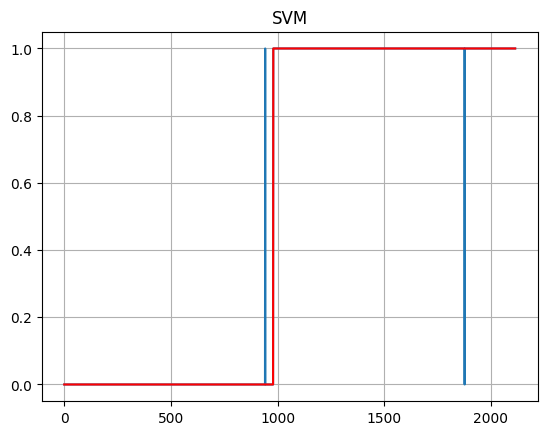

[  112   114   142   150   576   732  1236  1513  1529  1608  1676  1720
  2007  2093  2094  2145  2148  2371  2480  2512  2786  2848  2934  2956
  2963  2974  3092  3191  3362  3412  3539  3754  3783  3865  3873  3954
  4207  4519  4529  4608  4652  4827  4881  4918  5675  5759  5788  5793
  5954  6060  6387  6576  6626  6695  6777  7074  7144  7411  7557  7621
  7853  8204  8386  8431  8547  8701  8731  8935  9274  9476  9530  9541
  9662  9747  9875 10077 10148 10225 10239 10934 11017 11102 11613 12018]
84


In [7]:
start = time.time()
clf_svm = SVC(kernel = 'linear')
clf_svm.fit(x_train_2cls, y_train_2cls)
y_pred = clf_svm.predict(x_test_2cls)
print(time.time() - start)

print(clf_svm.support_vectors_)

y_pred = np.array(y_pred)
comp = (y_pred == y_test_2cls)
N_cor = sum(comp)
print(y_pred[~comp])
print(y_test_2cls[~comp])
print('amount of error', len(y_test_2cls[~comp]))
print(N_cor / float(len(y_test_2cls)) * 100., '%')

plt.figure(6)
plt.plot(y_pred)
plt.plot(y_test_2cls, c = 'r')
plt.grid()
plt.title('SVM')
plt.show()

sup_vectors = clf_svm.support_
print(sup_vectors)
print(len(sup_vectors))

In [31]:
#print(clf_svm.class_weight_)
#print
print(len(clf_svm.coef_[0]))
print(clf_svm.coef_)
print()
#print(clf_svm.dual_coef_)
#print(len(clf_svm.dual_coef_[0]))
#print(clf_svm.intercept_)

784
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.0

In [32]:
a = clf_svm.coef_[0]
b = clf_svm.intercept_[0]
print(a, b)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [33]:
index_support = []
eps = 10 ** -3
for i in range(len(x_train_2cls)):
    tmp = x_train_2cls[i] @ a + b
    if abs(tmp) <= 1. + eps and abs(tmp) > 1. - eps:
        index_support.append(i)
    #if i in sup_vectors:
        #print(tmp)
print(len(index_support))
print(len(sup_vectors))
print(index_support)
print(sup_vectors)
print('number of equals', sum(index_support == sup_vectors))

84
84
[112, 114, 142, 150, 576, 732, 1236, 1513, 1529, 1608, 1676, 1720, 2007, 2093, 2094, 2145, 2148, 2371, 2480, 2512, 2786, 2848, 2934, 2956, 2963, 2974, 3092, 3191, 3362, 3412, 3539, 3754, 3783, 3865, 3873, 3954, 4207, 4519, 4529, 4608, 4652, 4827, 4881, 4918, 5675, 5759, 5788, 5793, 5954, 6060, 6387, 6576, 6626, 6695, 6777, 7074, 7144, 7411, 7557, 7621, 7853, 8204, 8386, 8431, 8547, 8701, 8731, 8935, 9274, 9476, 9530, 9541, 9662, 9747, 9875, 10077, 10148, 10225, 10239, 10934, 11017, 11102, 11613, 12018]
[  112   114   142   150   576   732  1236  1513  1529  1608  1676  1720
  2007  2093  2094  2145  2148  2371  2480  2512  2786  2848  2934  2956
  2963  2974  3092  3191  3362  3412  3539  3754  3783  3865  3873  3954
  4207  4519  4529  4608  4652  4827  4881  4918  5675  5759  5788  5793
  5954  6060  6387  6576  6626  6695  6777  7074  7144  7411  7557  7621
  7853  8204  8386  8431  8547  8701  8731  8935  9274  9476  9530  9541
  9662  9747  9875 10077 10148 10225 10239 10934

In [34]:
print(x_train_2cls @ a + b)
res = x_train_2cls @ a + b
res1 = abs(res) < 1. + eps
res2 = abs(res) > 1. - eps
sup_vec_res = res1 & res2
print(sum(sup_vec_res))

[-4.72315934 -4.34540429 -4.76188502 ...  4.20182298  5.06904827
  4.44780773]
84


In [35]:
#x_train_2cls, y_train_2cls

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_train_2cls)
df = pd.DataFrame()
df["y"] = y_train_2cls
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

zeros = df.loc[df['y'] == 0.0]
ones = df.loc[df['y'] == 1.0]

print('train 2 classes', len(y_train_2cls))
print('df', len(df))
print('zeros', len(zeros))
print('ones', len(ones))

#sns.scatterplot(tsne.embedding_)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12665 samples in 0.011s...
[t-SNE] Computed neighbors for 12665 samples in 5.965s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12665
[t-SNE] Computed conditional probabilities for sample 2000 / 12665
[t-SNE] Computed conditional probabilities for sample 3000 / 12665
[t-SNE] Computed conditional probabilities for sample 4000 / 12665
[t-SNE] Computed conditional probabilities for sample 5000 / 12665
[t-SNE] Computed conditional probabilities for sample 6000 / 12665
[t-SNE] Computed conditional probabilities for sample 7000 / 12665
[t-SNE] Computed conditional probabilities for sample 8000 / 12665
[t-SNE] Computed conditional probabilities for sample 9000 / 12665
[t-SNE] Computed conditional probabilities for sample 10000 / 12665
[t-SNE] Computed conditional probabilities for sample 11000 / 12665
[t-SNE] Computed conditional probabilities for sample 12000 / 12665
[t-SNE] Computed conditional probabilities for sam

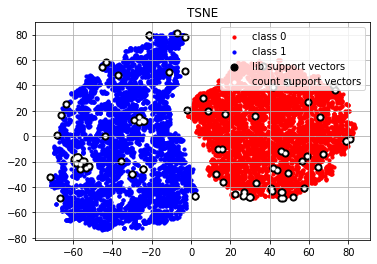

In [36]:
plt.figure(8)
plt.scatter(zeros["comp-1"], zeros["comp-2"], c = 'r', s = 10, label = 'class 0')
plt.scatter(ones["comp-1"], ones["comp-2"], c = 'b', s = 10, label = 'class 1')
plt.scatter(df["comp-1"][sup_vectors], df["comp-2"][sup_vectors], c = 'black', s = 50, label = 'lib support vectors')
plt.scatter(df["comp-1"][sup_vec_res], df["comp-2"][sup_vec_res], c = 'white', s = 10, label = 'count support vectors')
plt.legend()
plt.grid()
plt.title('TSNE')
plt.show()

[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

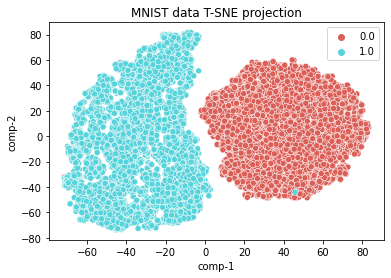

In [18]:
sns.scatterplot(x="comp-1", y="comp-2", hue = df.y.tolist(),
                palette = sns.color_palette("hls", 2),
                data=df).set(title="MNIST data T-SNE projection")

0.0 1.0


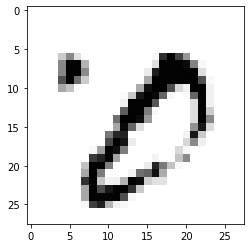

In [19]:
img = (x_test_2cls[~comp])[0]
plt.imshow(img.reshape(28, 28), cmap="Greys")
print((y_test_2cls[~comp])[0], (y_pred[~comp])[0])

In [ ]:
print(time.time())


now = datetime.datetime.now()
print(now.time())

In [ ]:
start = time.time()
now = datetime.datetime.now()
print(now.time())
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf_gb.fit(x_train, y_train)
y_pred = clf_gb.predict(x_test)
print(time.time() - start)

y_pred = np.array(y_pred)
comp = (y_pred == y_test)
N_cor = sum(comp)
print(y_pred[~comp][:50])
print(y_test[~comp][:50])
print('amount of error', len(y_test[~comp]))
print(N_cor / float(len(y_test)) * 100., '%')

plt.figure(7)
plt.plot(y_pred)
plt.plot(y_test, c = 'r')
plt.grid()
plt.title('Gradient Boosting')
plt.show()

In [ ]:
img = (x_test[~comp])[0]
plt.imshow(img.reshape(28, 28), cmap="Greys")